<a href="https://colab.research.google.com/github/chlin1/Finance/blob/master/pricePredictionLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Stock Prices Using LSTM network

* Stock prices are downloaded from finance.yahoo.com. Disneyland (DIS) Stock Price CSV file.
* Closed value (column[5]) is used in the network, LSTM Code
* Values are normalized in range (0,1).
* Datasets are splitted into train and test sets, 50% test data, 50% training data.
* Keras-Tensorflow is used for implementation.
* LSTM network consists of 25 hidden neurons, and 1 output layer (1 dense layer).
* LSTM network features input: 1 layer, output: 1 layer , hidden: 25 neurons, optimizer:adam, dropout:0.1, timestep:240, batchsize:240, epochs:1000 (features can be further optimized).
* Root mean squared errors are calculated.
* Output files: lstm_results (consists of prediction and actual values), plot file (actual and prediction values).


* Ref: https://github.com/omerbsezer/LSTM_RNN_Tutorials_with_Demo/tree/master/StockPricesPredictionProject

In [1]:
! git clone https://github.com/chlin1/Finance.git

Cloning into 'Finance'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [0]:
import os
os.getcwd()
os.chdir("/content/Finance/")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

Using TensorFlow backend.


In [0]:
# file is downloaded from finance.yahoo.com, 1.1.1997-1.1.2017
# training data = 1.1.1997 - 1.1.2007
# test data = 1.1.2007 - 1.1.2017
input_file="DIS.csv"

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
# fix random seed for reproducibility
np.random.seed(5)

In [0]:
# load the dataset
df = read_csv(input_file, header=None, index_col=None)


In [0]:
df.head;

In [0]:
# take close price column[5]
all_y = df[5].values
dataset=all_y.reshape(-1, 1)

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [0]:
# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [0]:
# reshape into X=t and Y=t+1, timestep 240
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=1)

Epoch 1/1000
2276/2276 [==============================] - 2s 1ms/step - loss: 0.0047
Epoch 2/1000
2276/2276 [==============================] - 0s 40us/step - loss: 0.0018
Epoch 3/1000
2276/2276 [==============================] - 0s 35us/step - loss: 0.0012
Epoch 4/1000
2276/2276 [==============================] - 0s 37us/step - loss: 9.6096e-04
Epoch 5/1000
2276/2276 [==============================] - 0s 37us/step - loss: 7.6098e-04
Epoch 6/1000
2276/2276 [==============================] - 0s 36us/step - loss: 6.2442e-04
Epoch 7/1000
2276/2276 [==============================] - 0s 36us/step - loss: 5.4379e-04
Epoch 8/1000
2276/2276 [==============================] - 0s 37us/step - loss: 5.0495e-04
Epoch 9/1000
2276/2276 [==============================] - 0s 38us/step - loss: 4.4634e-04
Epoch 10/1000
2276/2276 [==============================] - 0s 37us/step - loss: 3.9307e-04
Epoch 11/1000
2276/2276 [==============================] - 0s 36us/step - loss: 3.8123e-04
Epoch 12/1000
2276/22

In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [16]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.52 RMSE
Test Score: 13.81 RMSE


In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [0]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

testPrices:
testPredictions:
[[28.394623]
 [28.766953]
 [28.962902]
 ...
 [72.43251 ]
 [72.45943 ]
 [71.87088 ]]


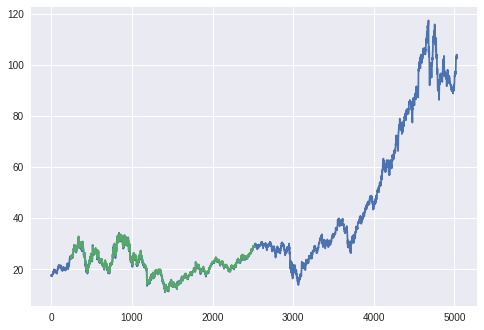

In [19]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])

print('testPredictions:')
print(testPredict)

In [0]:
# export prediction and actual prices
df = pd.DataFrame(data={"prediction": np.around(list(testPredict.reshape(-1)), decimals=2), "test_price": np.around(list(testPrices.reshape(-1)), decimals=2)})
df.to_csv("lstm_result.csv", sep=';', index=None)

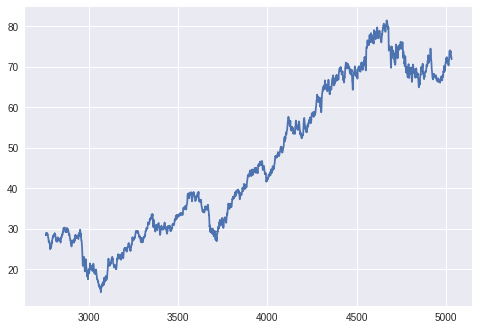

In [22]:
# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(testPredictPlot)
plt.show()
